# Trained SVM classifier on a generated moon dataset

In [1]:
# Common imports 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# to make this notebook's output stable across runs 
np.random.seed(42) 

# sklearn imports
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import make_moons

# moons dataset generated with 10,000 samples
X, y = make_moons(n_samples=10000, noise=0.1) 


print("done")

done


In [2]:
# train test split imported from sklearn in order to assign data to different sections of the model for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 2), (8000,), (2000, 2), (2000,))

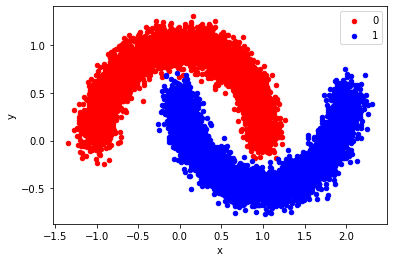

In [3]:
# moon dataset plotted 
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'blue', 1:'red'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [4]:
# model defined, radial basis kernel used as it is a nonlinear dataset
from sklearn.svm import SVC

model = SVC(kernel='rbf').fit(X_train, y_train)

print(model.score(X_train, y_train))

0.999125


In [9]:
# hyper perameters tuned by randomised search with cross validation
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import reciprocal, uniform 
svm_clf = SVC(decision_function_shape="ovr", gamma="auto") 
svm_clf.fit(X_train[:10000], y_train[:10000])
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)} 
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3) 
rnd_search_cv.fit(X_train[:10000], y_train[:10000]) 
rnd_search_cv.best_estimator_ 
rnd_search_cv.best_score_ 

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=2.888287366539485, gamma=0.044644733963447224; total time=   0.8s
[CV] END ....C=2.888287366539485, gamma=0.044644733963447224; total time=   0.8s
[CV] END ....C=2.888287366539485, gamma=0.044644733963447224; total time=   0.8s
[CV] END .....C=4.55045437122979, gamma=0.004755972775838484; total time=   0.9s
[CV] END .....C=4.55045437122979, gamma=0.004755972775838484; total time=   0.9s
[CV] END .....C=4.55045437122979, gamma=0.004755972775838484; total time=   0.9s
[CV] END ....C=1.1181733577821054, gamma=0.09450569185856389; total time=   0.7s
[CV] END ....C=1.1181733577821054, gamma=0.09450569185856389; total time=   0.8s
[CV] END ....C=1.1181733577821054, gamma=0.09450569185856389; total time=   0.7s
[CV] END ....C=7.120043391718638, gamma=0.007005841899219033; total time=   0.8s
[CV] END ....C=7.120043391718638, gamma=0.007005841899219033; total time=   0.8s
[CV] END ....C=7.120043391718638, gamma=0.007005

0.9837498744764931

In [11]:
#retraining best estimator on whole training set
rnd_search_cv.best_estimator_.fit(X_train, y_train) 
y_pred = rnd_search_cv.best_estimator_.predict(X_train) 
print(accuracy_score(y_train, y_pred))

0.989


In [12]:
# model tested on test set
y_pred = rnd_search_cv.best_estimator_.predict(X_test) 
accuracy_score(y_test, y_pred) 

0.9875

In [13]:
# Confusion Matrix and Classification report
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[984  12]
 [ 13 991]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.99      0.99      0.99      1004

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [14]:
# Mean Squared Error, Accuracy, Average Precision Score, Recall, ROC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)}")
print(f"Precision: {average_precision_score(y_test, y_pred, average='macro', pos_label=1, sample_weight=None)}")
print(f"Recall: {recall_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')}")
print(f"Receiver Operating Curve: {roc_curve(y_test, y_pred, pos_label=None, sample_weight=None, drop_intermediate=True)}")

Mean Squared Error: 0.0125
Accuracy: 0.9875
Precision: 0.9817425988965375
Recall: 0.9870517928286853
Receiver Operating Curve: (array([0.        , 0.01204819, 1.        ]), array([0.        , 0.98705179, 1.        ]), array([2, 1, 0], dtype=int64))


Area under the ROC curve : 0.960821


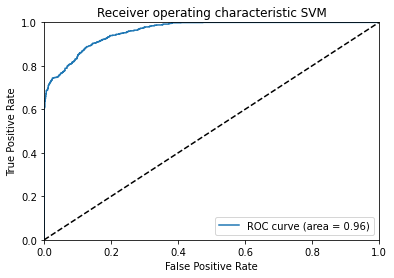

In [22]:
import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
# ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)
# Plot curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic SVM')
pl.legend(loc="lower right")
pl.show()

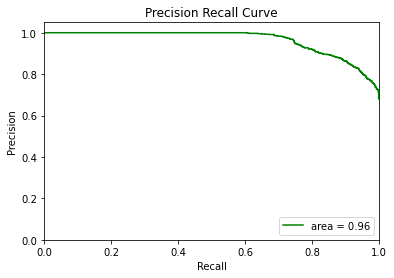

In [24]:
# Precision-Recall curve
classifier.fit(X_train, y_train)
try:
    scores = classifier.decision_function(X_test)
except:
    scores = classifier.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=1)
average_precision = average_precision_score(y_test, scores)

plt.plot(recall, precision, label='area = %0.2f' % average_precision, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Trained Decision Tree on a generated moon data set

In [25]:
from sklearn.datasets import make_moons

In [26]:
X, y = make_moons(n_samples=10000, noise=0.1, random_state=42) 

In [27]:
#Split it into a training set and a test set using train_test_split(). 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [28]:
#Grid search with cross-validation 
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier 
params = {'max_leaf_nodes': list(range(90, 900)), 'min_samples_split': [2, 3, 4]} 
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3) 
grid_search_cv.fit(X_train, y_train) 
grid_search_cv.best_estimator_ 
from sklearn.metrics import accuracy_score 
y_pred = grid_search_cv.predict(X_test) 
accuracy_score(y_test, y_pred) 

Fitting 3 folds for each of 2430 candidates, totalling 7290 fits


0.9995

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1013    0]
 [   1  986]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1013
           1       1.00      1.00      1.00       987

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [30]:
# Mean Squared Error, Accuracy, Average Precision Score, Recall, ROC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)}")
print(f"Precision: {average_precision_score(y_test, y_pred, average='macro', pos_label=1, sample_weight=None)}")
print(f"Recall: {recall_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')}")
print(f"Receiver Operating Curve: {roc_curve(y_test, y_pred, pos_label=None, sample_weight=None, drop_intermediate=True)}")

Mean Squared Error: 0.0005
Accuracy: 0.9995
Precision: 0.9994868287740628
Recall: 0.9989868287740629
Receiver Operating Curve: (array([0., 0., 1.]), array([0.        , 0.99898683, 1.        ]), array([2, 1, 0], dtype=int64))


Area under the ROC curve : 0.970939


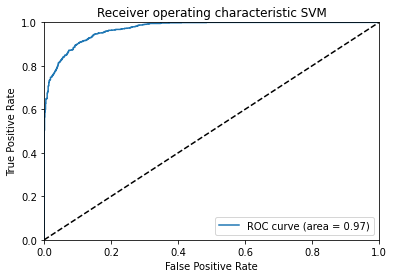

In [33]:
import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
# ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)
# Plot curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic SVM')
pl.legend(loc="lower right")
pl.show()

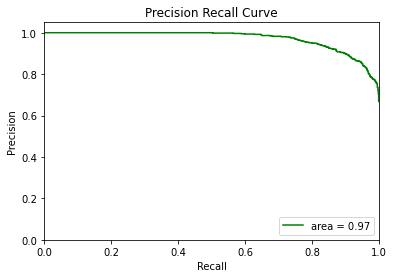

In [34]:
# Precision-Recall curve
classifier.fit(X_train, y_train)
try:
    scores = classifier.decision_function(X_test)
except:
    scores = classifier.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=1)
average_precision = average_precision_score(y_test, scores)

plt.plot(recall, precision, label='area = %0.2f' % average_precision, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()